# Loop Workflow Leaflet

> * High level approach to making a 3D model from just a bounding box and source files as input. (In Australia only for now. Documentation to come)
> * To run this notebook, please download and unzip the Turner Syncline data folder (https://github.com/Loop3D/Turner_Syncline/) into where this notebook is running.

In [426]:
import folium
from ipyleaflet import Map, basemaps, GeoJSON, LayersControl, DrawControl,WMSLayer, GeoData
from ipywidgets import Label
from ipywidgets import Label
import ipywidgets as widgets
import numpy as np
from shapely.geometry import Polygon

In [468]:
existing_extent = (138.362206, -32.463842, 139.262268, -31.999178)
center = (existing_extent[1]+existing_extent[3])/2, (existing_extent[0]+existing_extent[2])/2
minlat = existing_extent[3]
maxlat = existing_extent[1]
minlong = existing_extent[2]
maxlong = existing_extent[0]
lat_point_list = [minlat, minlat, maxlat, maxlat,maxlat]
lon_point_list = [minlong, maxlong, maxlong, minlong, minlong]
bbox_geom = Polygon(zip(lon_point_list, lat_point_list))
mbbox = geopandas.GeoDataFrame(index=[0], crs=map_crs, geometry=[bbox_geom])
example_rect = GeoData(geo_dataframe = mbbox,
                   style={'color': 'purple', 'opacity':3, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},                  
                   name = 'Example')
print(map_crs,mbbox.total_bounds)
mbbox=mbbox.to_crs(proj_crs)
print(proj_crs,mbbox.total_bounds)


EPSG:4326 [138.362206 -32.463842 139.262268 -31.999178]
EPSG:28354 [ 250805.15298565 6405084.32805869  336682.92153939 6458336.08597563]


In [469]:
# center=(-33.5,138.7)



wms_warox = WMSLayer(
    url='http://geo.loop-gis.org/geoserver/GSSA/wms?',
    layers='GSSA:sth_flinders',
    format='image/png',
    transparent=True,
    attribution='Outcrop data from GSSA',
    name='outcrops'

)
wms_geol = WMSLayer(
    url='http://geo.loop-gis.org/geoserver/GSSA/wms?',
    layers='GSSA:2m surface geology',
    format='image/png',
    transparent=True,
    opacity=0.4,
    attribution='Geology data from GSSA',
    name='geology'

)
m =Map(basemap=basemaps.OpenTopoMap, center=center, zoom=8,scroll_wheel_zoom=True)
label = Label()
display(label)

def handle_interaction(**kwargs):
    if kwargs.get('type') == 'mousemove':
        label.value = str(kwargs.get('coordinates'))

m.on_interaction(handle_interaction)
m.add_layer(wms_geol)
m.add_layer(wms_warox)
# if(not test_data_name =='Draw Your Own'):
#     m.add_layer(example_rect)


m.add_control(LayersControl())
dc = DrawControl(rectangle={'shapeOptions': {'color': '#0000FF'}})
m.add_control(dc)
m.add_layer(example_rect)
m

Label(value='')

Map(center=[-32.23151, 138.81223699999998], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_i…

In [470]:
map_crs = 'EPSG:4326'
proj_crs = 'EPSG:28354'

In [471]:
minx = mbbox.total_bounds[0]
maxx = mbbox.total_bounds[2]
miny = mbbox.total_bounds[1]
maxy = mbbox.total_bounds[3]

In [472]:
# [ 274934.13200956 6297758.41393543  323980.90024616 6329307.64682912]
bbox_3d = {'minx': minx,
 'miny': miny,
 'maxx': maxx,
 'maxy': maxy,
 'base': -3200,
 'top': 1200}

## Map2Loop

In [473]:
import geopandas
geopandas.read_file('SA/data/null_mindeps.shp')

,SITE_CODE,SITE_TITLE,SHORT_NAME,SITE_COMMO,SITE_TYPE_,SITE_SUB_T,SITE_STAGE,TARGET_COM,COMMODITY_,PROJ_CODE,PROJ_TITLE,WEB_LINK,EXTRACT_DA,geometry
0,S0001482,Vivash Gorge,Vivash Gorge,Fe,Deposit,Unspecified,Undeveloped,IRON ORE,IRON,J03931,Brockman 4 Area / Rio Tinto,http://minedexext.dmp.wa.gov.au/minedex/extern...,2018-05-07,POINT (505671.537 7495706.968)
1,S0231563,Eliwana Exploration Camp,Exploration camp,Fe,Infrastructure,Town/Village/Camp,Operating,IRON ORE,IRON,J03436,Western Hub / FMG,http://minedexext.dmp.wa.gov.au/minedex/extern...,2018-05-07,POINT (503344.199 7511681.103)
2,S0233921,Eliwana Far East 2 Marra Mamba,Eliwana Far East 2 Marra Mamba,Fe,Deposit,Unspecified,Undeveloped,IRON ORE,IRON,J03436,Western Hub / FMG,http://minedexext.dmp.wa.gov.au/minedex/extern...,2018-05-07,POINT (505699.008 7509917.737)


not remote

 orientations layer  metadata
--------------------
    bbox [ 251265.92339537 6405219.91312584  336426.97143085 6458322.32358355]
    CRS epsg:28354
    # items 380
    Data types ['Point']

 geology layer  metadata
--------------------
    bbox [ 240894.27769116 6373566.35247716  406152.30668822 6479787.90087657]
    CRS epsg:28354
    # items 72
    Data types ['Polygon']

 fold layer  metadata
--------------------
    bbox [ 251200.08969364 6405084.32805869  300888.60554507 6458336.08597563]
    CRS PROJCS["GDA94_MGA_zone_54",GEOGCS["GDA94",DATUM["Geocentric_Datum_of_Australia_1994",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6283"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4283"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",141],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",

Normalized/laundered field name: 'fdipest_vals' to 'fdipest_va'



 fault layer  metadata
--------------------
    bbox [ 251200.08969364 6405084.32805869  300888.60554507 6458336.08597563]
    CRS +init=epsg:28354 +type=crs
    # items 16
    Data types ['LineString']

 mindeps layer  metadata
--------------------
    empty file, check contents

Warnings:
     No extra litho for geology polygons
     No more extra litho for geology polygons
     84 NaN/blank found in column "STRATDESC" of geology file, replacing with 0
     No fold polarity for fold polylines
     No fault dip for fault polylines
     No fault dip direction for fault polylines
     No fault dip estimate for fault polylines
     No fault dip estimate text for fault polylines
     No fault name for fault polylines
     no mindeps for analysis

No errors found, clipped and updated files saved to tmp
Input graphic saved to: ./interactive_model-test2/tmp/input-fig.png


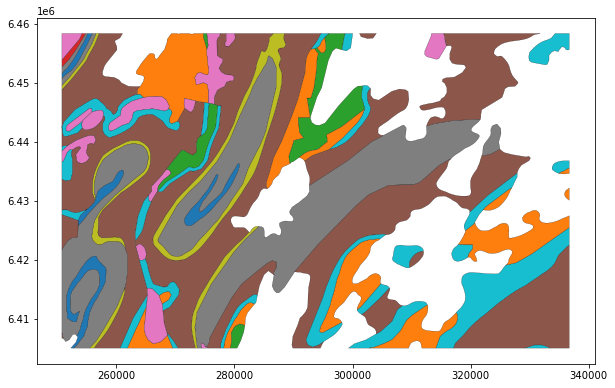

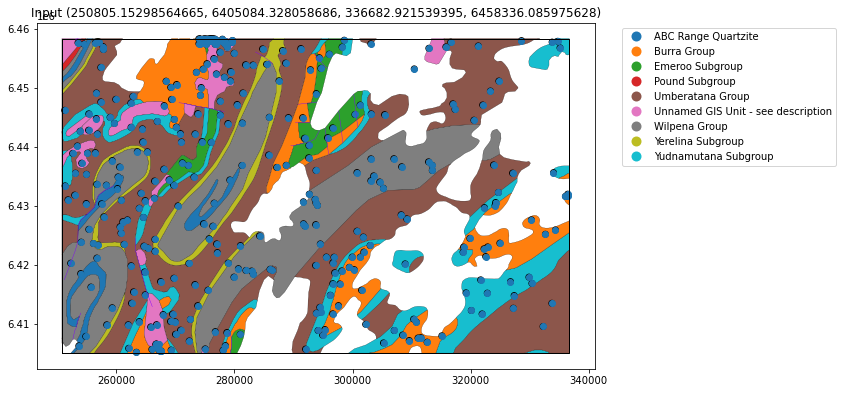

In [456]:
import os
import hjson

from map2loop.project import Project

%matplotlib inline
proj = Project( 
                 structure_file='SA/data/sth_flinders_28354.shp',
                fault_file='SA/data/2M Linear Structures_28354.shp',
                fold_file='SA/data/2M Linear Structures_28354.shp',
                geology_file='SA/data/2M_Surface_Geology_28354_relage.shp',
                mindep_file="/home/lgrose/dev/python/map2loop/source_data/null_mindeps.shp",
                 metadata='SA/data/meta.hjson',
                 state = "SA",
                 remote = False,
#                 clut_path='SA/data/GSSA_2M_colours.csv'
                 # path to hosted metadata describing the remote sources
#                  metadata='https://gist.githubusercontent.com/yohanderose/8f843de0dde531f009a3973cbdadcc9f/raw/918f412ae488ce1a6bca188306f7730061ecf551/meta_remote.hjson')                
)
proj.update_config(
                    out_dir='./interactive_model-test2',
                    bbox_3d=bbox_3d,
                    proj_crs={'init': 'EPSG:28354'},
#                     quiet=True,
                    overwrite=True,
                    drift_prefix=['T','Q','water','void']
                  )
proj.config.clut_path='SA/data/GSSA_2M_colours.csv'

  0%|          | 0/100 [00:00<?, ?it/s]

Generating topology analyser input...
HOW MANY COLUMNS IN GEOL 10
72  polygons
Successful parameter load
Output directory created at: ./interactive_model-test2/graph/
Topology analysis complete.

Resolving ambiguities using ASUD...	output_dir:./interactive_model-test2/graph/
Done.
Generating topology graph display and unit groups...
0    'Heysen Supergroup', 'anchor': 'n', 'fontStyle': 'bold'
1    'Unnamed GIS Unit - see description', 'anchor': 'n', 'fontStyle': 'bold'
2    'Warrina Supergroup', 'anchor': 'n', 'fontStyle': 'bold'
3    'Wilpena Group', 'anchor': 'n', 'fontStyle': 'bold'
4    'ABC Range Quartzite'
5    'Burra Group'
6    'Emeroo Subgroup'
7    'Pound Subgroup'
8    'Umberatana Group'
9    'Unnamed GIS Unit - see description'
10    'Wilpena Group'
11    'Yerelina Subgroup'
12    'Yudnamutana Subgroup'
Topology figure saved to ./interactive_model-test2/tmp/topology-fig.png


 10%|█         | 10/100 [00:02<00:20,  4.31it/s]

Done
Fetching DTM...  bbox:138.2487471414877 139.37108898881752 -32.579487181629595 -31.883661960489242
Attempt: 0 dtm geotif saved as ./interactive_model-test2/dtm/dtm.tif
Done.
reprojected dtm geotif saved as ./interactive_model-test2/dtm/dtm_rp.tif


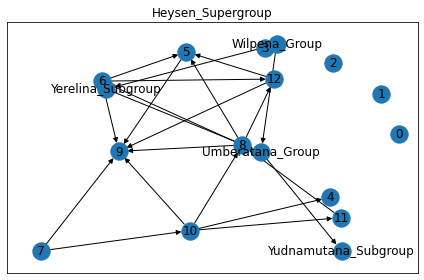

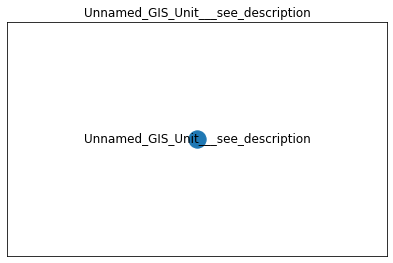

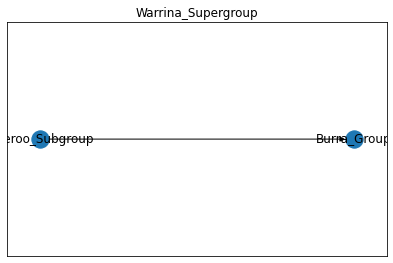

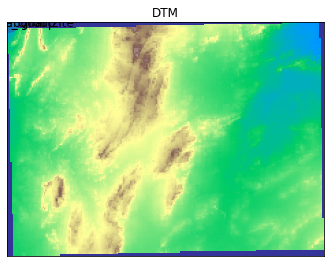

 30%|███       | 30/100 [00:08<00:18,  3.80it/s]

group choices: 1
dtb and dtb_null set to 0
372 orientations saved to ./interactive_model-test2/output/orientations.csv


 50%|█████     | 50/100 [00:09<00:10,  4.79it/s]

extra orientations saved as ./interactive_model-test2/output//empty_series_orientations.csv
basal contacts saved allpts= 1528 deci_pts= 520
saved as ./interactive_model-test2/tmp/all_contacts.csv and ./interactive_model-test2/tmp/contacts.csv
basal contacts without faults saved as ./interactive_model-test2/tmp/basal_contacts.shp


 60%|██████    | 60/100 [00:12<00:08,  4.69it/s]

decimated contacts saved as ./interactive_model-test2/output/contacts4.csv
All observations n= 380
groups ['Warrina Supergroup' 'Heysen Supergroup' 'Wilpena Group'
 'Unnamed GIS Unit - see description' 'Moralana Supergroup'] 
codes ['Emeroo Subgroup' 'Yudnamutana Subgroup' 'ABC Range Quartzite'
 'Unnamed GIS Unit - see description' 'Pound Subgroup' 'Wilpena Group'
 'Umberatana Group' 'Yerelina Subgroup' 'Burra Group']


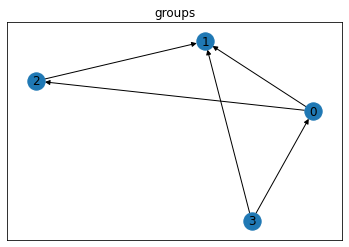

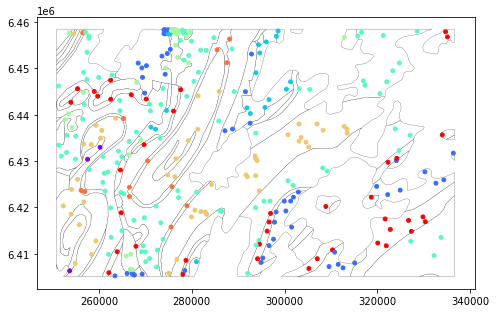

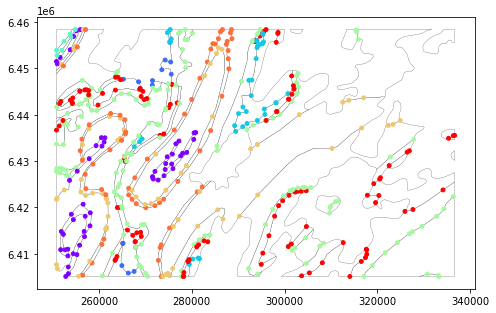

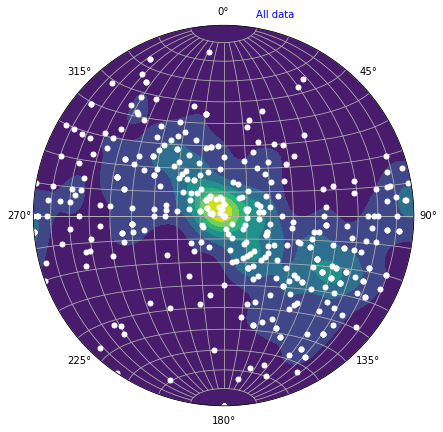

----------------------------------------------------------------------------------------------------------------------
Warrina Supergroup observations n= 102
strike/dip of girdle 269.72659235794464 / 89.24932719291581


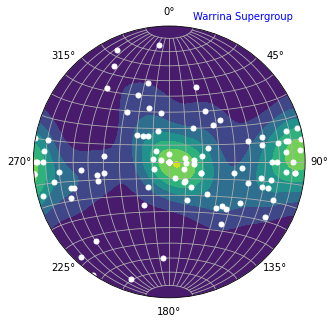

----------------------------------------------------------------------------------------------------------------------
Heysen Supergroup observations n= 218
strike/dip of girdle 124.6564456072315 / 89.70614506898454


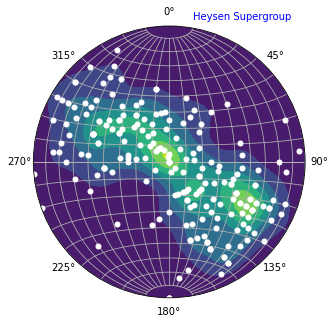

----------------------------------------------------------------------------------------------------------------------
Wilpena Group observations n= 3
strike/dip of girdle 80.7534224822727 / 22.95404573089843


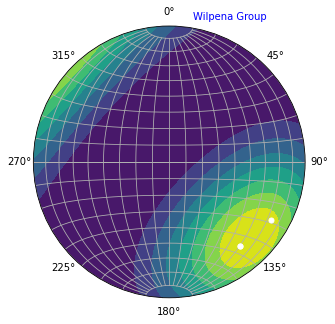

----------------------------------------------------------------------------------------------------------------------
Unnamed GIS Unit - see description observations n= 48
strike/dip of girdle 296.6997514353252 / 83.81600997987476


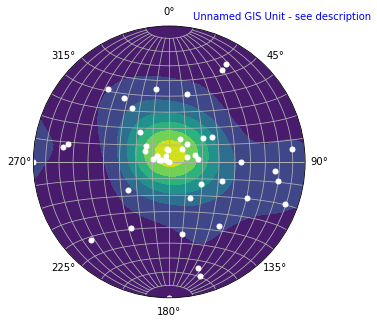

----------------------------------------------------------------------------------------------------------------------
Moralana Supergroup observations has 1 observation
172 107
interpolated dips


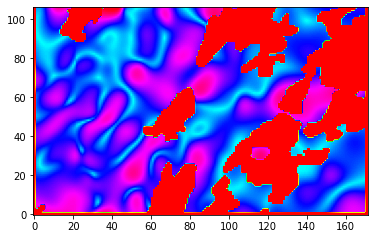

interpolated dip directions


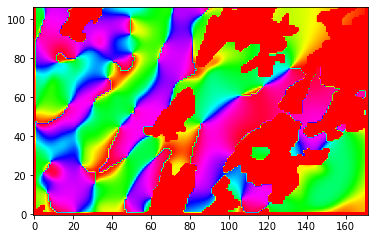

interpolated contacts


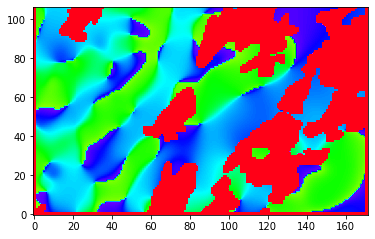

 70%|███████   | 70/100 [00:19<00:10,  2.73it/s]

fault orientations saved as ./interactive_model-test2/output/fault_orientations.csv
fault positions saved as ./interactive_model-test2/output/faults.csv
fault dimensions saved as ./interactive_model-test2/output/fault_dimensions.csv


 90%|█████████ | 90/100 [00:22<00:02,  3.38it/s]

fault displacement estimates saved as ./interactive_model-test2/output/fault_displacements3.csv
near-fault orientations saved as ./interactive_model-test2/tmp/ex_f_combo_full.csv
near-fault orientations saved as ./interactive_model-test2/tmp/ex_f_combo_full.csv
0 Wilpena_Group
1 Heysen_Supergroup
2 Warrina_Supergroup
3 Unnamed_GIS_Unit___see_description
pluton contacts and orientations saved as:
./interactive_model-test2/output/ign_contacts.csv
./interactive_model-test2/output/ign_orientations_domes.csv
Propagating dips along contacts...
101
300 points saved to ./interactive_model-test2/tmp/raw_contacts.csv
168 thickness estimates saved as ./interactive_model-test2/output/formation_thicknesses.csv
['Yerelina_Subgroup' 'Umberatana_Group' 'Yudnamutana_Subgroup'
 'Emeroo_Subgroup' 'ABC_Range_Quartzite' 'Wilpena_Group'] already processed
10 min thickness estimates appended to ./interactive_model-test2/output/formation_thicknesses.csv
Yerelina_Subgroup 440.0 243.09006480694174
Umberatana_Gr

100%|██████████| 100/100 [00:27<00:00,  3.60it/s]

cycles []


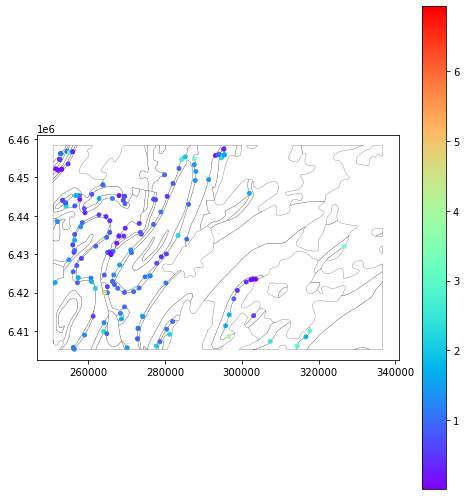

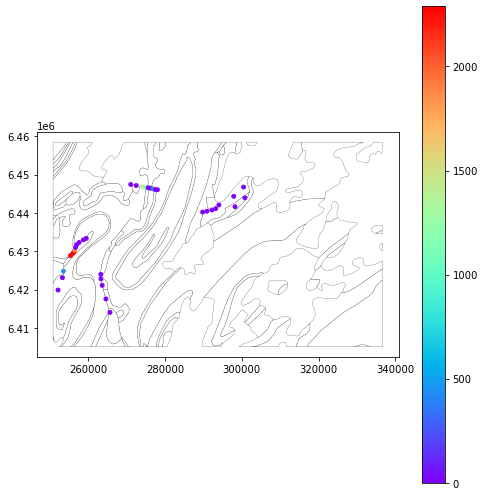

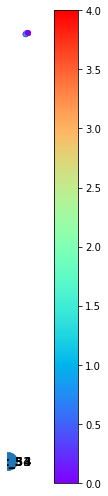

In [457]:
proj.run()

## Loop Structural

In [382]:
# Define project pathing from m2l
proj_path = proj.config.project_path
graph_path = proj.config.graph_path
tmp_path = proj.config.tmp_path
data_path = proj.config.data_path
dtm_path = proj.config.dtm_path
output_path = proj.config.output_path
vtk_path = proj.config.vtk_path

# Define project bounds
minx,miny,maxx,maxy = proj.config.bbox
model_base = proj.config.bbox_3d['base']
model_top = proj.config.bbox_3d['top']

fault_file = proj.config.fault_file_csv

In [648]:
import random
import os
import time
from datetime import datetime
import shutil
import logging
logging.getLogger().setLevel(logging.INFO)

import numpy as np
from LoopStructural import GeologicalModel
import lavavu
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural import GeologicalModel

nowtime=datetime.now().isoformat(timespec='minutes')   
model_name='leaflet'+'_'+nowtime.replace(":","-").replace("T","-")
if (os.path.exists(vtk_path+model_name)):
    shutil.rmtree(vtk_path+model_name)
os.mkdir(vtk_path+model_name)
filename=vtk_path+model_name+'/'+'surface_name_{}.vtk'


f=open(tmp_path+'bbox.csv','w')
f.write('minx,miny,maxx,maxy,lower,upper\n')
ostr='{},{},{},{},{},{}\n'.format(minx,miny,maxx,maxy,model_base,model_top)
f.write(ostr)
f.close()
t1 = time.time()
fault_params = {'interpolatortype':'FDI',
                'nelements':3e4,
                'data_region':.1,
                'solver':'lu',
#                 overprints:overprints,
                'cpw':10,
                'npw':10}
foliation_params = {'interpolatortype':'FDI' , # 'interpolatortype':'PLI', 'FDI', 'surfe'
                    'nelements':3e5,  # how many tetras/voxels
                    'buffer':1.8,  # how much to extend interpolation around box
                    'solver':'pyamg',
                    'damp':True,
                    'cpw':5,
                    'npw':5}

model, m2l_data = GeologicalModel.from_map2loop_directory(proj_path,
                                                          skip_faults=False,
                                                          fault_params=fault_params,
                                                          foliation_params=foliation_params)





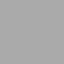

In [665]:
view = LavaVuModelViewer(model,vertical_exaggeration=1) 
view.nsteps = np.array([200,200,200])
#view.set_zscale(2)
# view.add_model()
view.nelements = 3e5#steps=np.array([,50,50])
#view.add_model_surfaces(filename=filename)
view.add_model_surfaces(fault_colours='red')
# view.add_data(model.features[-1])
view.interactive()  


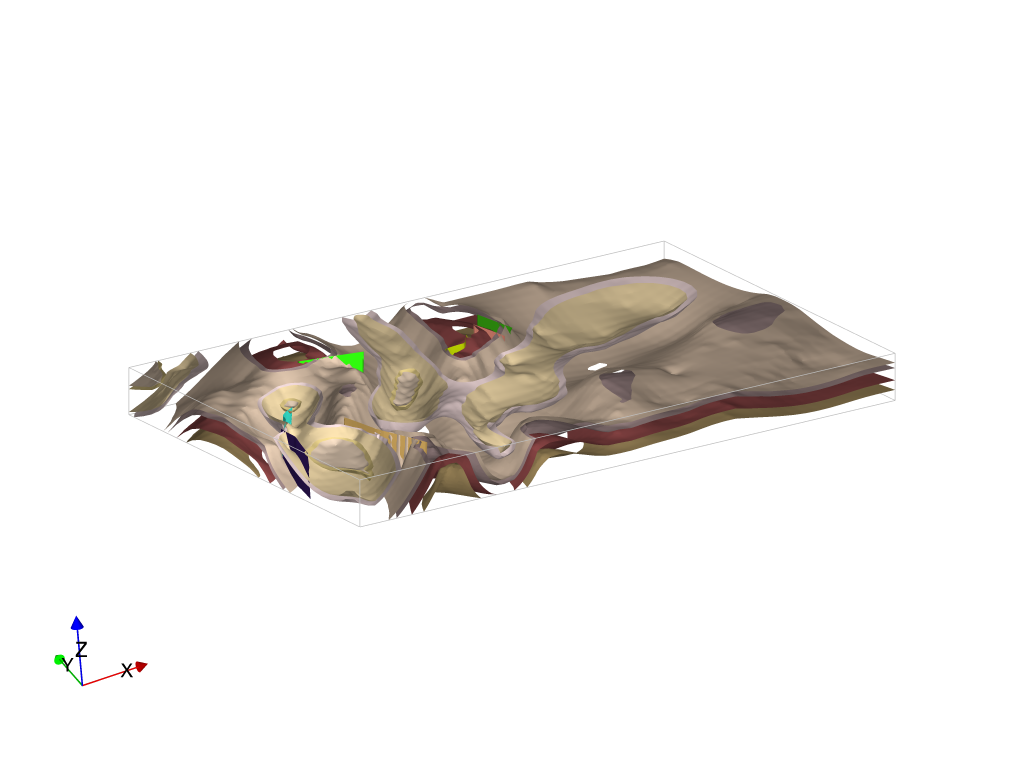

In [667]:
view.display()

In [651]:
from LoopStructural.visualisation import MapView
from map2loop.map import MapUtil

In [652]:
extent=[model.bounding_box[0,0], model.bounding_box[1,0], model.bounding_box[0,1], model.bounding_box[1,1]]

In [653]:
maps =proj.config.geol_clip#geopandas.read_file(proj.config.tmp_path+'geol_clip.shp')
masp = maps[maps['STRATNAM_1']!='Unnamed GIS Unit - see description']

Fetching DTM...  bbox:138.2487471414877 139.37108898881752 -32.579487181629595 -31.883661960489242
Attempt: 0 dtm geotif saved as ./interactive_model-test2/dtm/dtm.tif
Done.
reprojected dtm geotif saved as ./interactive_model-test2/dtm/dtm_rp.tif


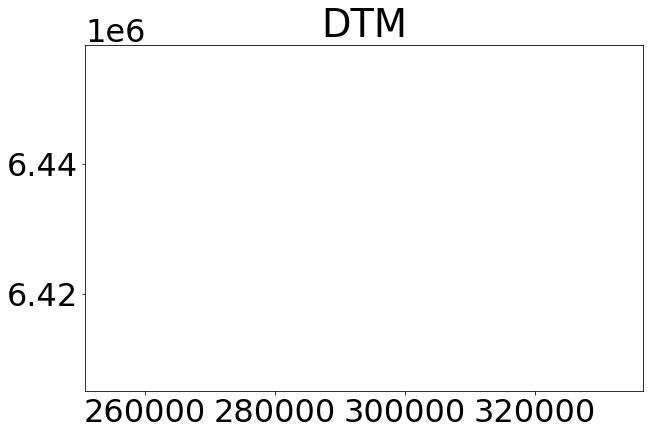

In [654]:
mapview = MapView(model)
proj.config.load_dtm()
geomap = MapUtil(proj.config.bbox_3d,maps,proj.config.dtm)
mapview.nsteps = (200,200)
xy = np.array([mapview.xx
               .flatten(),mapview.yy.flatten()]).T
dtm = geomap.evaluate_dtm_at_points(xy)


In [655]:
geo_map = geomap.evaluate_geology_at_points(xy)
# dtm[:]=0
model_map = model.evaluate_model(np.vstack([xy.T,dtm]).T)

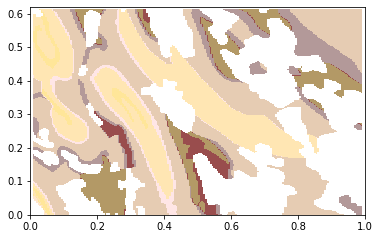

In [656]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(geo_map.reshape(mapview.nsteps).T,cmap=proj.config.cmap,extent=extent)

In [657]:
diff = geo_map-model_map
diff[diff==0]= np.nan

In [658]:
b = []
# b.append(0)
for v in m2l_data['strat_va']:
    b.append(v)


In [659]:
data = []
colours = []
boundaries = []
for u, v in m2l_data['stratigraphic_column']['supergroup_0'].items():
    data.append((m2l_data['strat_va'][u],v['colour']))
    colours.append(v['colour'])
    boundaries.append(m2l_data['strat_va'][u])    

In [660]:
from matplotlib import colors
cmap = colors.ListedColormap(colours)
cmap = colors.ListedColormap(cmap.colors[::-1])
b = np.array(boundaries)
print()
b = b[::-1]
boundaries = colors.BoundaryNorm(b,ncolors=len(colours))

In [661]:
# mapview = MapView(model)
# mapview.add_data(model.features[-1],grad=False,cmap=cmap)
# mapview.add_scalar_field(model.features[-1],cmap=cmap,norm=boundaries)


In [662]:
val_data = model.features[-1].interpolator.get_value_constraints()[:,:4]
val_data = np.copy(val_data)
model.rescale(val_data[:,:3],inplace=True)

array([[3.01573836e+05, 6.41075103e+06, 3.38000000e+02],
       [3.02226701e+05, 6.41124053e+06, 3.32000000e+02],
       [3.04565833e+05, 6.41343778e+06, 3.14000000e+02],
       ...,
       [2.95462513e+05, 6.45568922e+06, 4.99222400e+02],
       [2.95329096e+05, 6.45731246e+06, 4.92000000e+02],
       [2.95306859e+05, 6.45749035e+06, 4.78000000e+02]])

Text(0.5, 1.0, 'C. Interpolated geological map')

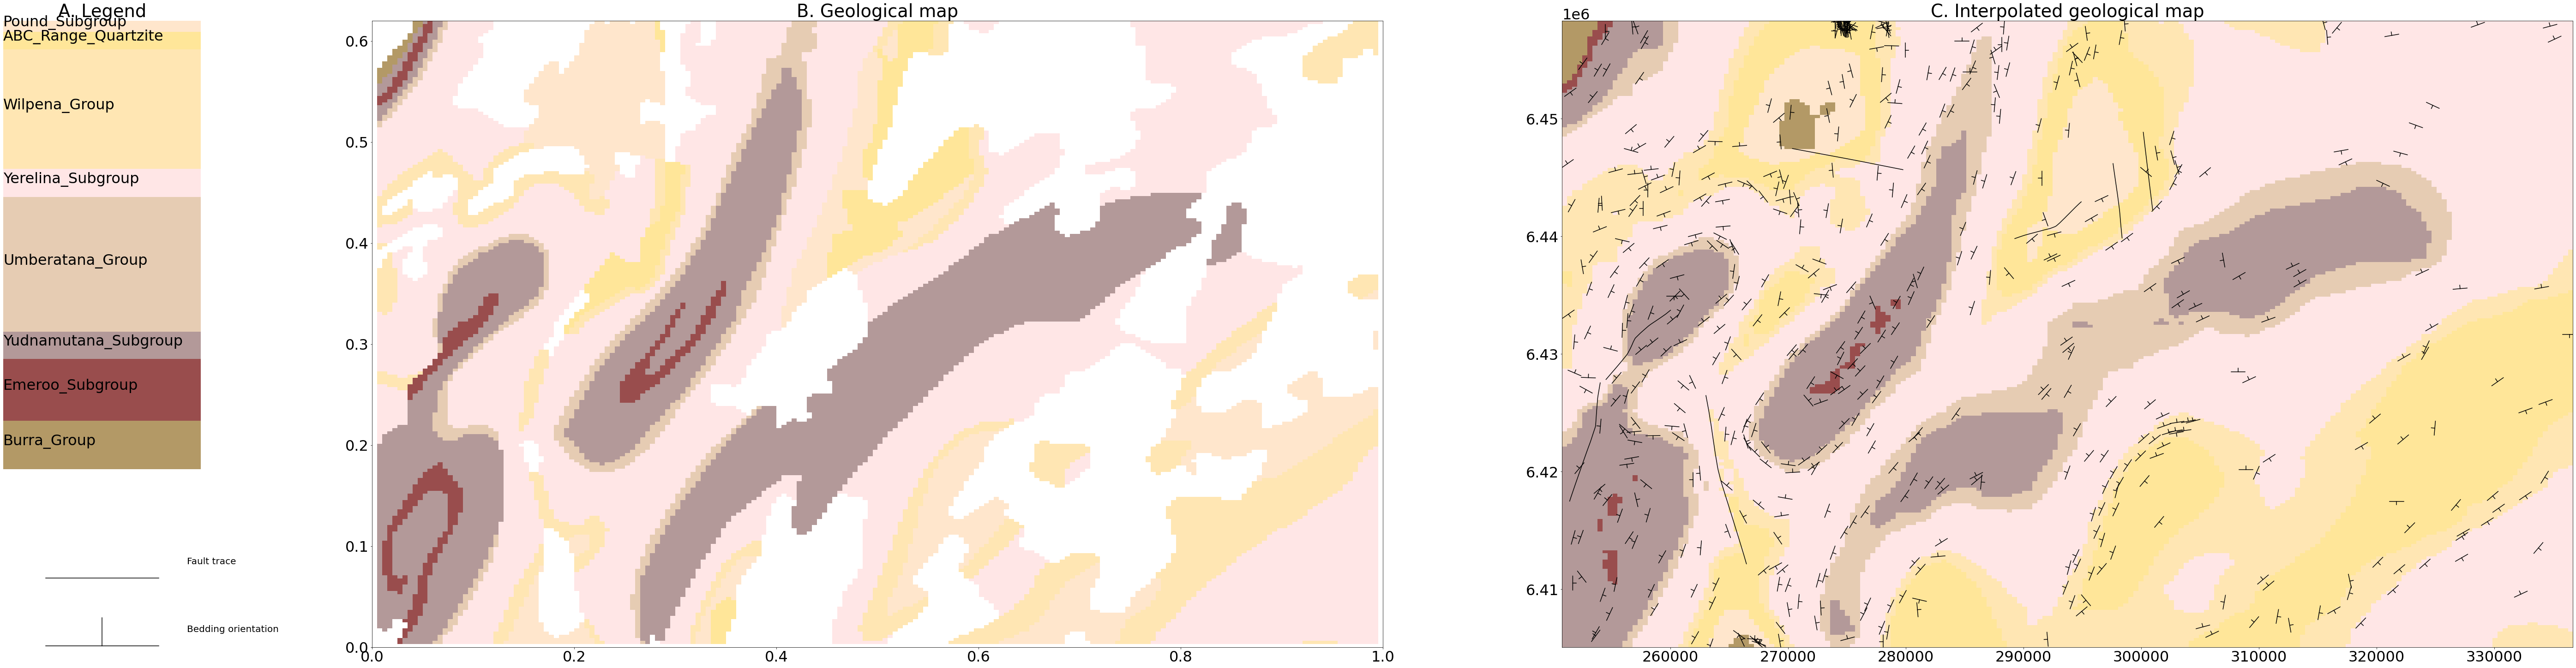

In [663]:
plt.rcParams.update({'font.size': 32})
fig3 = plt.figure(constrained_layout=True,figsize=(80,20))
nx = 6
gs = fig3.add_gridspec(5, 2*nx+1)
legend = fig3.add_subplot(gs[:-1, :1])
strike = fig3.add_subplot(gs[-1:,:1])

#add stike symbol
gradient_data = np.array([[0,1.,0]])
t = gradient_data[:, [1, 0]] * np.array([1, -1]).T
n = gradient_data[:, 0:2]
# t *= symb_scale
n *= 0.5
p1 = gradient_data[:, [0, 1]] - t
p2 = gradient_data[:, [0, 1]] + t
# plt.scatter(val[:,0],val[:,1],c='black')
strike.plot([p1[:, 0], p2[:, 0]], [p1[:, 1], p2[:, 1]], 'black')
p1 = gradient_data[:, [0, 1]]
p2 = gradient_data[:, [0, 1]] + n
strike.plot([p1[:, 0], p2[:, 0]], [p1[:, 1], p2[:, 1]], 'black')
strike.annotate("Bedding orientation", xy=[0,0],xytext=[1.5,.75],annotation_clip=False,size=20)
strike.set_xlim(-2,2)
# strike.plot()
strike.axis('off')
strike.axis('square')
p1 = gradient_data[:, [0, 1]] - t
p2 = gradient_data[:, [0, 1]] + t
strike.plot([p1[:, 0], p2[:, 0]], [p1[:, 1]+1.2, p2[:, 1]+1.2], 'black')
strike.annotate("Fault trace", xy=[0,1.2],xytext=[1.5,.75+1.2],annotation_clip=False,size=20)

# f3_ax1.set_title('gs[0, :-2]')
geol_map_ax = fig3.add_subplot(gs[:, 1:nx+1])
model_map_ax = fig3.add_subplot(gs[:, nx+1:])

column_ax = StratigraphiColumnView(model,legend)
geol_map_ax.imshow(geo_map.reshape(mapview.nsteps).T,extent=extent,cmap=cmap,origin='lower',vmin=0,vmax=7)
# proj.config.faults_clip.plot(ax=geol_map_ax)
mapview2 = MapView(model,ax=model_map_ax)
mapview2.nsteps=(200,200)
mapview2.add_data(model.features[-1],dip=False,val=False,symb_scale=600)
mapview2.add_model(cmap=cmap,z=dtm)
mapview2.add_faults(colors='black')
model_map_ax.imshow(model_map.reshape(mapview.nsteps).T,extent=extent,cmap=cmap,origin='lower',vmin=0,vmax=7)

legend.set_title('A. Legend')
geol_map_ax.set_title('B. Geological map')
model_map_ax.set_title('C. Interpolated geological map')

In [664]:
# fig, ax = plt.subplots(1,3,figsize=(100,40))
# mapview = MapView(model,ax=ax[1])
ax[0].imshow(model_map.reshape(mapview.nsteps).T,extent=extent,cmap=cmap,origin='lower',vmin=0,vmax=7)
ax[1].imshow(geo_map.reshape(mapview.nsteps).T,extent=extent,cmap=cmap,origin='lower',vmin=0,vmax=7)
ax[2].imshow(diff.reshape(mapview.nsteps).T,extent=extent,origin='lower')
# mapview.add_data(model.features[-1],grad=False,cmap=cmap)
# ax[0].set_title('A. )

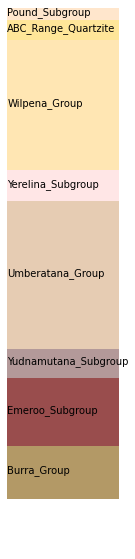

In [549]:
strat = StratigraphiColumnView(model)

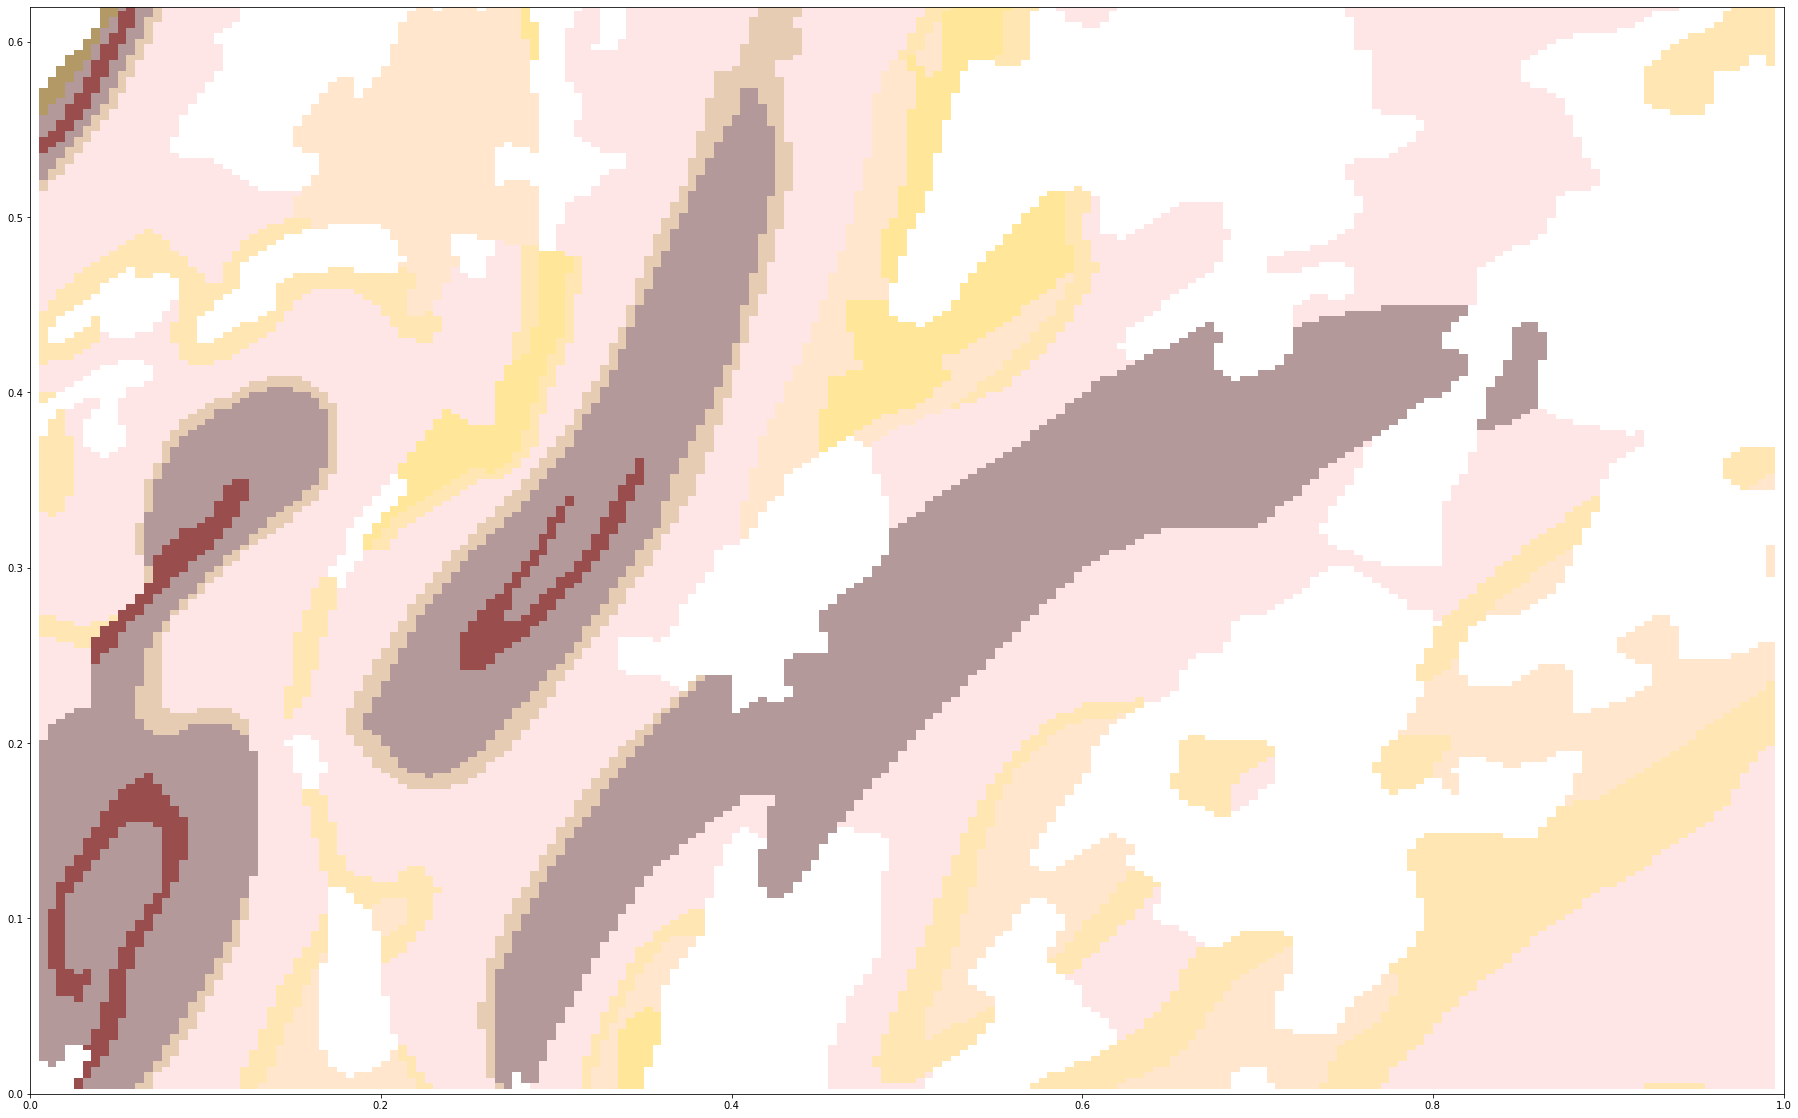

In [550]:
plt.figure(figsize=(40,20))
plt.imshow(geo_map.reshape(mapview.nsteps).T,extent=extent,cmap=cmap,origin='lower',vmin=0,vmax=7)

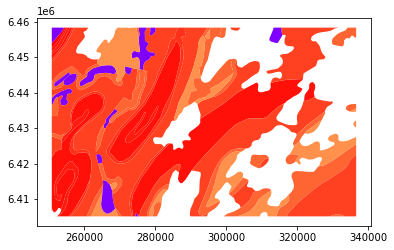

In [551]:
maps = geopandas.read_file(proj.config.tmp_path+'geol_clip.shp')
ax = maps.plot('ave',cmap='rainbow_r')
# plt.colorbar(ax)

In [552]:
model.stratigraphic_column['supergroup_0'].keys()

dict_keys(['Pound_Subgroup', 'ABC_Range_Quartzite', 'Wilpena_Group', 'Yerelina_Subgroup', 'Umberatana_Group', 'Yudnamutana_Subgroup', 'Emeroo_Subgroup', 'Burra_Group'])

ValueError: could not convert string to float: 

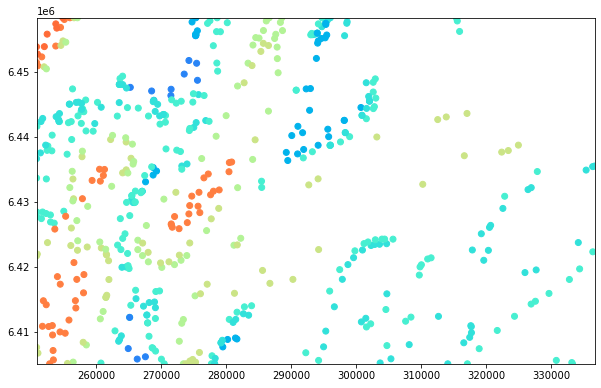

In [553]:
mapview2 = MapView(model)
mapview2.nsteps = (200,200)
mapview2.add_data(model.features[-1],grad=False)
mapview2.add_model('')#(model_map.reshape(mapview.nsteps).T,extent=extent,cmap='tab20',origin='lower',vmin=0,vmax=7)


In [ ]:
np.unique(geo_map[~np.isnan(geo_map)].flatten())

In [ ]:
contact_loc = m2l_data['data'][['X','Y','Z','formation','val','gx']]

In [ ]:
contact_loc = contact_loc[~np.isnan(contact_loc['val'])]
contact_loc['id'] = np.nan
for u in model.stratigraphic_column['supergroup_0'].keys():
    contact_loc.loc[contact_loc['formation']==u,'id'] = model.stratigraphic_column['supergroup_0'][u]['id']
#     if model.stratigraphic_column['supergroup_0'][u]['id'] == val:

In [ ]:
contact_obs = contact_loc[['X','Y','id']].to_numpy()
plt.scatter(contact_obs[:,0],contact_obs[:,1],c=contact_obs[:,2],cmap='tab20',s=5)

In [ ]:
mview = MapView(model)
mview.nsteps=(200,200)
mview.add_model()#,vmin=0,vmax=10)

In [ ]:
extent = (model.origin[0],model.maximum[0],model.origin[1],model.maximum[1])

In [ ]:
name

In [ ]:
proj.config.geol_clip

In [ ]:
fig, ax = plt.subplots(8,3,figsize=(20,5*8))
lines = geopandas.read_file(proj.config.tmp_path+'basal_contacts.shp')
geol = geopandas.read_file(proj.config.tmp_path+'geol_clip.shp')#proj.config.geol_clip
for val in range(8):
#     val = 1
    name = None
    for u in model.stratigraphic_column['supergroup_0'].keys():
        if model.stratigraphic_column['supergroup_0'][u]['id'] == val:
            name =  u
#         if name == None:
#             for u in model.stratigraphic_column['supergroup_1'].keys():
#                 if model.stratigraphic_column['supergroup_1'][u]['id'] == val:
#                     name =  u
    if name == None:
        continue
    val_data = contact_loc.loc[contact_loc['formation']==name,['X','Y','val']].to_numpy()
    geo_map_0 = np.zeros(geo_map.shape)
    geo_map_0[:] = np.nan
    geo_map_0[geo_map==val] = 0
    ax[val][0].imshow(geo_map_0.reshape(mapview.nsteps).T,origin='lower',extent=extent)
    model_map_0 = np.zeros(model_map.shape)
    model_map_0[:] = np.nan
    model_map_0[model_map==val] = 0
    ax[val][1].imshow(model_map_0.reshape(mapview.nsteps).T,origin='lower',extent=extent)
    geol[geol['STRATNAME']==name.replace('_',' ')].plot(ax=ax[val][1],facecolor='none',edgecolor='black')
    # mask = val_data[:,3] == val
    ax[val][1].scatter(val_data[:,0],val_data[:,1],s=5,c='r')
    ax[val][0].scatter(val_data[:,0],val_data[:,1],s=5,c='r')
    lines[lines['STRATNAME']==name].plot(ax=ax[val][2])
    for i in range(3):
        ax[val][i].set_xlim(extent[0],extent[1])
        ax[val][i].set_ylim(extent[2],extent[3])
    ax[val][0].set_title('Geological map {}'.format(name))
    ax[val][1].set_title('Model map pattern {}'.format(name))
    ax[val][2].set_title('Basal contacts {}'.format(name))

plt.tight_layout()

In [ ]:
lines = geopandas.read_file(proj.config.tmp_path+'basal_contacts.shp')
# lines[lines['STRATNAME']==name].plot()
plt.scatter(val_data[:,0],val_data[:,1])

In [ ]:
points_raw = pd.read_csv(proj.config.output_path+'contacts_clean.csv')

In [ ]:
location_data = points_raw.loc[points_raw['formation']==name,['X','Y']].to_numpy()

In [ ]:
plt.scatter(location_data[:,0],location_data[:,1])

NameError: name 'faults_clip' is not defined

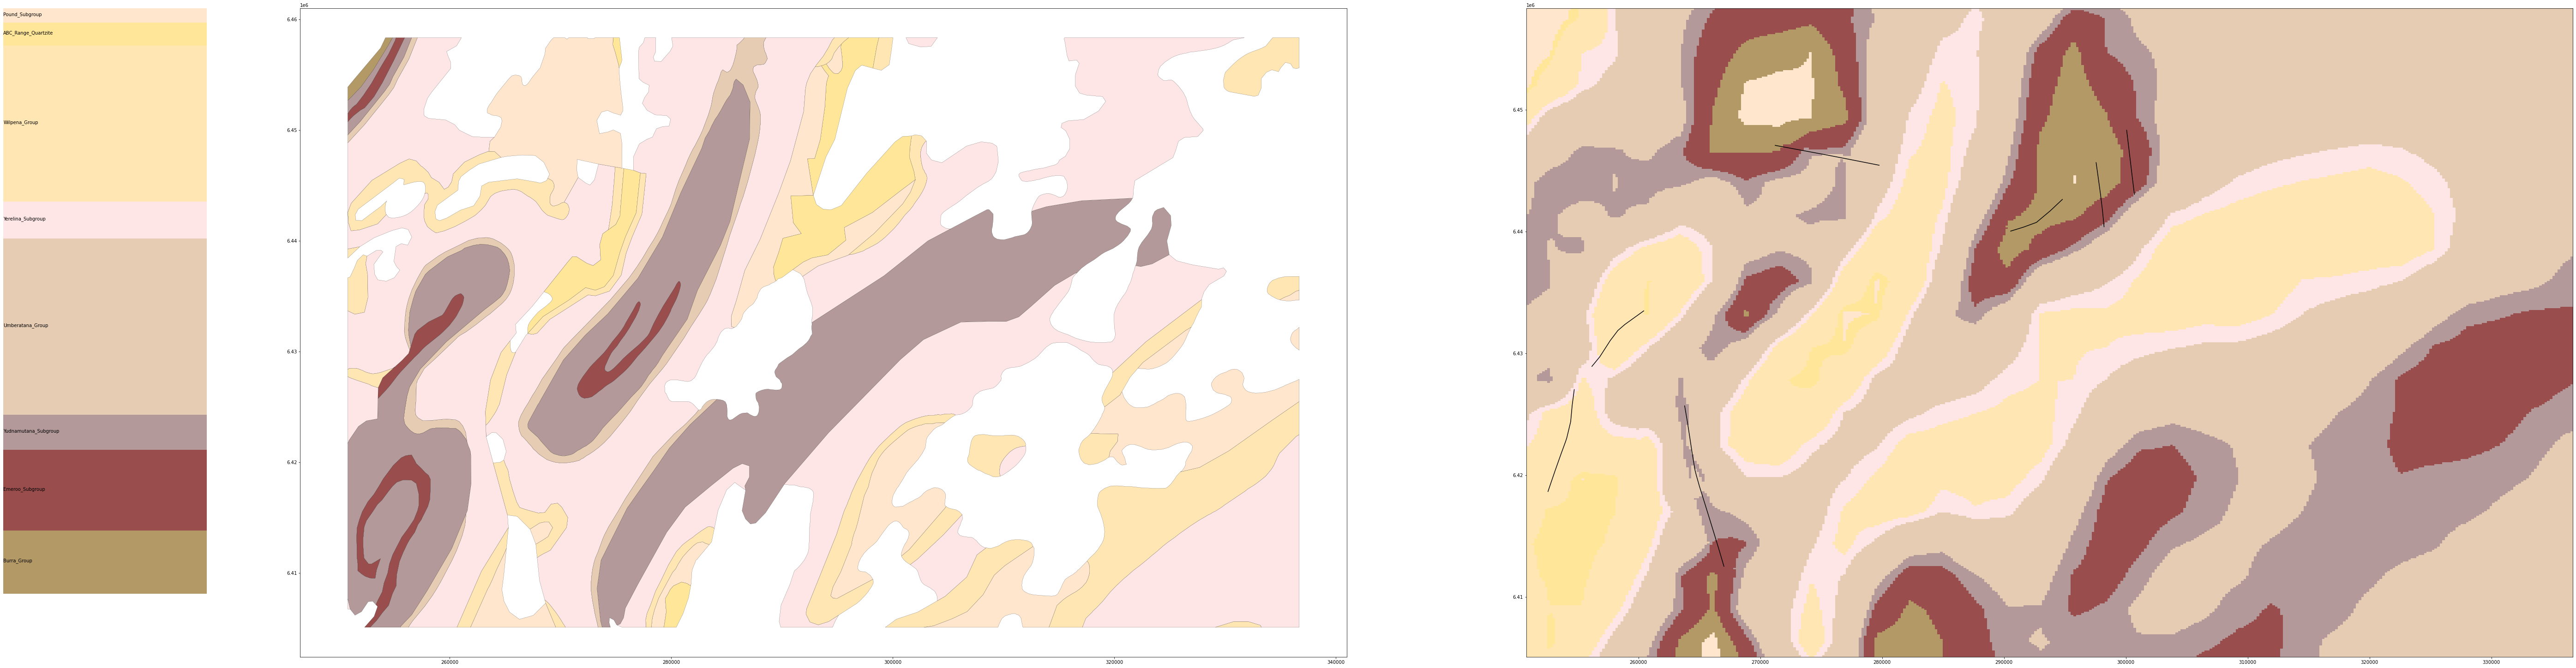

In [533]:
import matplotlib.colors as colors
from LoopStructural import MapView
fig3 = plt.figure(constrained_layout=True,figsize=(80,20))
nx = 6
gs = fig3.add_gridspec(3, 2*nx+1)
legend = fig3.add_subplot(gs[:, :1])
# f3_ax1.set_title('gs[0, :-2]')
geol_map = fig3.add_subplot(gs[:, 1:nx+1])
model_map = fig3.add_subplot(gs[:, nx+1:])
column = StratigraphiColumnView(model,legend)

# fig, ax = plt.subplots(1,2,figsize=(20,10))
# colours = [] #container for the discrete colours we are using
# # random_colours = np.random.random((len(geology_ll['STRATNAME'].unique()),3)) #random colours
# asc=pd.read_csv(tmp_path+'all_sorts_clean.csv',",")
# #display(asc)
# colours=pd.read_csv(clut_path,",")
# if( c_l['c']=='CODE'):
#     code=c_l['c'].lower()
# else:
#     code=c_l['c']

# colours = [] #container for the discrete colours we are using
# i=0
# geol_clip['colour_index'] = np.nan #initialise a colour index attribute column
# for ind,strat in asc.iterrows():
#     geol_clip[c_l['c']].str.replace(" ","_")
#     geol_clip.loc[geol_clip[c_l['c']]==strat['code'].replace("_"," "),'colour_index'] = i
#     colours.append(strat['colour'])
#     i=i+1
    
# #     cmap = colors.ListedColormap(colours)
# cmap = colors.ListedColormap(colours) # create a cmap for passing to geopandas
base=proj.config.geol_clip.plot(column='colour_index',figsize=(10,10),edgecolor='#000000',linewidth=0.2,cmap=cmap,ax=geol_map)
mapview = MapView(model,ax=model_map)
mapview.add_faults(colors='black')
mapview.nsteps = (400,400)
mapview.add_model(z=600)
faults_clip.plot(color='black',ax=geol_map)
geol_all = gpd.read_file('../SA/data/2M_Surface_Geology_28354_relage.shp').to_crs(dst_crs)
geol_all[geol_all['MAPSYMB']=='Qpa'].plot(facecolor='None',edgecolor='red',linewidth=0.5,ax=geol_map)
geol_map.set_ylim(geology_ll.total_bounds[1],geology_ll.total_bounds[3])
geol_map.set_xlim(geology_ll.total_bounds[0],geology_ll.total_bounds[2],)
                                           
geol_all[geol_all['MAPSYMB']=='Qpa'].plot(facecolor='None',edgecolor='red',linewidth=0.5,ax=model_map)
model_map.set_ylim(geology_ll.total_bounds[1],geology_ll.total_bounds[3])
model_map.set_xlim(geology_ll.total_bounds[0],geology_ll.total_bounds[2],)
legend.set_title('A. Stratigraphic column')
geol_map.set_title('B. Geological map')
model_map.set_title('C. Interpolated geological map')
mapview2  = MapView(model,ax=geol_map)
mapview2.add_data(model.get_feature_by_name('supergroup_0'),val=False,dip=False,symb_scale=500)